In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dataset_sdn.csv')
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [3]:
data['port_no'].var()

1.1757778657502853

In [4]:
data.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [5]:
sdn = data.copy()

In [6]:
sdn = sdn.drop(['dt', 'switch', 'src', 'dst'], axis=1)

In [7]:
sdn.head()

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [8]:
sdn = sdn.dropna()

In [9]:
sdn.isna().sum(axis=0)

pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [10]:
sdn = sdn[sdn['pktrate'] != 0]
sdn.shape

(75546, 19)

### Encodage de Protocol

In [11]:
sdn = pd.get_dummies(sdn, columns = ['Protocol', 'port_no'], dtype=int)

In [12]:
sdn.head()

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,...,tot_kbps,label,Protocol_ICMP,Protocol_TCP,Protocol_UDP,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,...,0.0,0,0,0,1,0,0,1,0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,...,0.0,0,0,0,1,0,0,0,1,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0.0,0,0,0,1,1,0,0,0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0.0,0,0,0,1,0,1,0,0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0.0,0,0,0,1,0,0,1,0,0


### Features and label

In [13]:
X = sdn.drop(['label'], axis=1)
y = (np.array(sdn['label'])).reshape(-1, 1)

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (75546, 24)
y shape : (75546, 1)


### Separation donnee entrainement et test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f'Shape de X_train : {X_train.shape}')
print(f'Shape de y_train : {y_train.shape}\n')

print(f'Shape de X_test : {X_test.shape}')
print(f'Shape de y_test : {y_test.shape}\n')

Shape de X_train : (56659, 24)
Shape de y_train : (56659, 1)

Shape de X_test : (18887, 24)
Shape de y_test : (18887, 1)



### Normalization

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Modele

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import load_model, Sequential

In [17]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(24,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,178 (39.76 KB)

 Trainable params: 10,178 (39.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    verbose=1,
    restore_best_weights=True
)

In [19]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128, callbacks=[early_stopping_callback])

Epoch 1/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8369 - loss: 0.3594 - val_accuracy: 0.9487 - val_loss: 0.1184
Epoch 2/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9477 - loss: 0.1213 - val_accuracy: 0.9637 - val_loss: 0.0875
Epoch 3/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9621 - loss: 0.0892 - val_accuracy: 0.9723 - val_loss: 0.0688
Epoch 4/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9712 - loss: 0.0703 - val_accuracy: 0.9754 - val_loss: 0.0590
Epoch 5/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9765 - loss: 0.0570 - val_accuracy: 0.9746 - val_loss: 0.0543
Epoch 6/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9783 - loss: 0.0507 - val_accuracy: 0.9801 - val_loss: 0.0463
Epoch 7/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9804 - loss: 0.0452 - val_accuracy: 0.9796 - val_loss: 0.0416
Epoch 8/100
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9814 - loss: 0.0418 - val_accu

In [20]:
model.save('DDoS.keras')

### Evaluation

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Accuracy : {test_acc * 100} %')

591/591 - 2s - 3ms/step - accuracy: 0.9894 - loss: 0.0232
Accuracy : 98.94106984138489 %


In [22]:
np.argmax(model.predict(X_test), axis=1)

591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Classification Report

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'DDoS']))

591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     10144
        DDoS       0.98      1.00      0.99      8743

    accuracy                           0.99     18887
   macro avg       0.99      0.99      0.99     18887
weighted avg       0.99      0.99      0.99     18887



### Confusion Matrix

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, X, y_true, classes, normalize=False, cmap=plt.cm.Blues):
    
    y_pred = np.argmax(model.predict(X), axis=1)
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           xlabel='Predicted label',
           ylabel='True label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax

591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Axes: xlabel='Predicted label', ylabel='True label'>

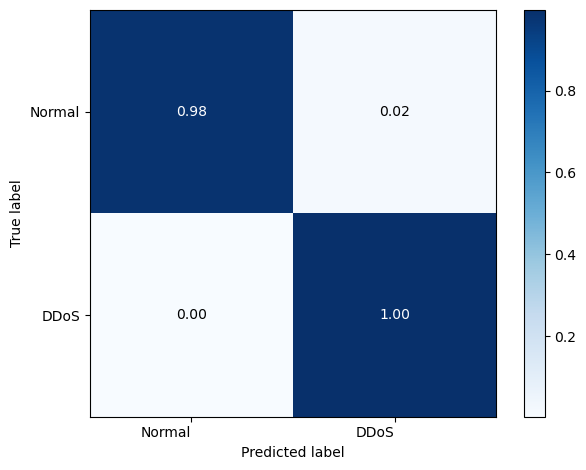

In [28]:
plot_confusion_matrix(model, X_test, y_test, classes=['Normal', 'DDoS'], normalize=True)